# Ejemplo con datos de Yahoo finance
Ahora hacemos un análisis de proyección de presios con diferentes marcas.

Considere que esta proyección es más precisa conforme se aumenta el número de escenarios simulados, así como disminuye en función al número de días proyectados a futuro.

Me voy literalmente a buscar online "Yahoo finance" y me meto a la página, donde veo que INTC es Intel, NVDA es NVIDIA, F es Ford y AAPL es Apple;
quiero importar sus datos históricos.
Escojo los valores con los que voy a trabajar para importarlos:


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf #librería de yahoo finance, predeterminada solo para google collab
#en jupiter tendría que instalar 'yfinance' así:
#!pip install yfinance

/tmp/ipython-input-3506702119.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2020-10-24',end='2025-10-24')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
[*********************100%***********************]  4 of 4 completed


<Axes: xlabel='Date'>

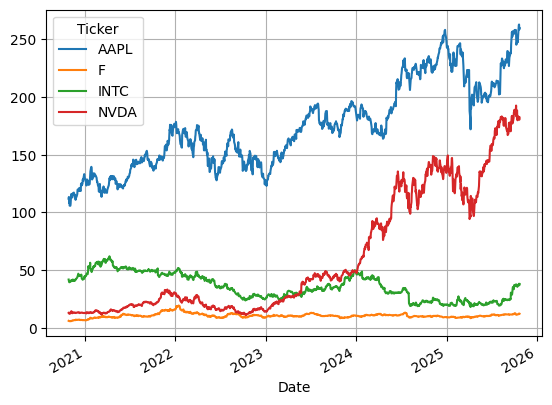

In [2]:
#Descargamos las marcas de interés:
#INTC-> Intel
#NVDA -> NVIDIA
#F -> Ford
#AAPL -> Apple
tickers=['INTC','NVDA','F','AAPL']
data=yf.download(tickers,start='2020-10-24',end='2025-10-24')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
data.plot(grid=True)

<Axes: xlabel='Date'>

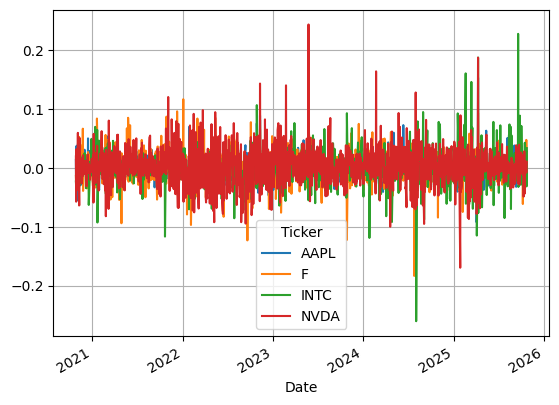

In [4]:
#La media no es constante en NVDA por lo que este método no es adecuado para mi modelo
#Calculamos las diferencias porcentuales y graficamos
#Diferencia entre el precio actual y el anterior, dividido entre el precio actual
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [5]:
#Podemos considerar medias constantes a lo largo del tiempo

array([[<Axes: title={'center': 'AAPL'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'INTC'}>,
        <Axes: title={'center': 'NVDA'}>]], dtype=object)

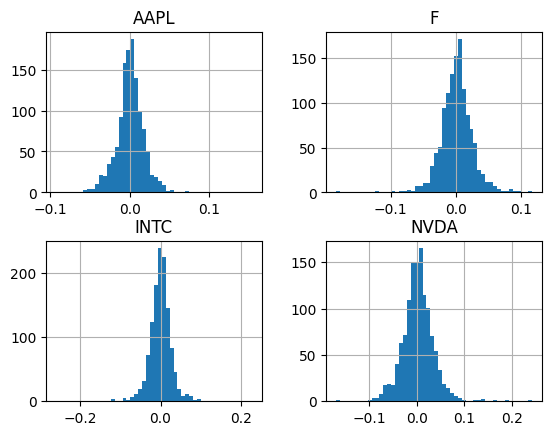

In [6]:
delta.hist(bins=50, grid=True)

In [7]:
#Veo que tengo algunos cesgos, la única centrada es INTC
#Si estuvieran más sesgados me convendría usar la distribución lognormal

In [ ]:
#Si la distribución no fuera normal, debería aplicarle una transformación de potencia para que se asemeje más a una distribución normal

In [11]:
#Simulamos los deltas (retorno porcentual)
N_dias=30 #simulamos 30 días
N_escenarios=10000 #10000 escenarios
delta_INTC=np.random.normal(delta['INTC'].mean(),delta['INTC'].std(),(N_dias,N_escenarios))
delta_INTC[:2,:10] #Mostrar los primeros dos días y los primeros 10 escenarios

array([[-0.01029211,  0.00601005,  0.04376746,  0.03854521,  0.01007724,
        -0.00846221,  0.06439458,  0.04240674, -0.03302262, -0.06563183],
       [ 0.00354173, -0.00335755, -0.02281916,  0.01609711,  0.03268651,
        -0.03668063,  0.00506398, -0.05019166,  0.00600414, -0.01758206]])

In [14]:
#Para asociarlo a los días simulados, creamos un rango de tiempo
rango_tiempo=pd.date_range('2025-10-27',periods=N_dias)
rango_tiempo

DatetimeIndex(['2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30',
               '2025-10-31', '2025-11-01', '2025-11-02', '2025-11-03',
               '2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-15',
               '2025-11-16', '2025-11-17', '2025-11-18', '2025-11-19',
               '2025-11-20', '2025-11-21', '2025-11-22', '2025-11-23',
               '2025-11-24', '2025-11-25'],
              dtype='datetime64[ns]', freq='D')

In [15]:
delta_INTC=pd.DataFrame(delta_INTC,index=rango_tiempo)
delta_INTC

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-10-27,-0.010292,0.006010,0.043767,0.038545,0.010077,-0.008462,0.064395,0.042407,-0.033023,-0.065632,...,0.030672,0.054888,0.003763,-0.006491,0.056547,-0.002906,-0.031352,0.033634,0.044817,0.004070
2025-10-28,0.003542,-0.003358,-0.022819,0.016097,0.032687,-0.036681,0.005064,-0.050192,0.006004,-0.017582,...,0.023125,-0.013157,0.032822,-0.026926,-0.002846,0.035716,0.010810,-0.017602,0.072576,0.007618
2025-10-29,0.014534,0.008740,0.012393,-0.002725,0.001680,0.048973,-0.014041,-0.013567,-0.009436,-0.023870,...,-0.096566,-0.045675,0.023708,0.060604,0.033406,-0.001455,0.000927,0.002021,0.005215,0.058696
2025-10-30,-0.014392,0.017663,-0.031652,0.044325,0.014976,-0.008116,-0.001993,0.003104,-0.015551,0.011425,...,-0.009112,-0.045191,0.006960,0.008022,0.006358,-0.017239,0.029285,0.044149,-0.009890,-0.001410
2025-10-31,-0.001725,0.019555,-0.011922,-0.045133,0.023805,0.009054,0.039153,-0.016466,-0.023428,0.013747,...,0.034809,-0.000902,-0.006477,0.008701,-0.007866,-0.040151,-0.032354,-0.001017,-0.010527,0.008993
2025-11-01,0.027314,0.027935,0.015499,0.045042,0.034430,0.019800,-0.025229,0.009865,-0.041977,-0.001697,...,0.044145,0.025270,0.017946,0.018132,-0.026877,-0.019360,0.031721,-0.009514,0.010966,0.020269
2025-11-02,0.000170,-0.023204,0.034733,0.036096,0.015405,-0.051554,-0.022965,0.047714,0.005344,0.013945,...,-0.066458,-0.002987,0.028893,-0.007041,-0.028683,0.019473,0.049324,0.027953,-0.006919,-0.007284
2025-11-03,-0.032548,0.010087,-0.024200,0.019908,-0.024871,-0.009620,-0.054625,-0.056166,0.008977,-0.006182,...,-0.003913,-0.006506,-0.028887,0.048016,0.027978,-0.025295,0.026685,-0.026597,0.012522,-0.011221
2025-11-04,0.056055,0.053629,0.047492,-0.015288,-0.015120,-0.017252,-0.052800,-0.019602,-0.004650,-0.003653,...,0.010952,0.005646,-0.021542,0.019537,-0.033105,-0.036810,-0.014779,-0.027483,0.001477,-0.013204
2025-11-05,0.033744,-0.018598,0.053571,-0.058404,0.038580,-0.054455,0.024171,-0.001720,-0.023196,0.041251,...,0.042338,0.026373,0.011587,0.023766,0.058080,0.015017,-0.016890,0.007575,-0.000992,-0.025489


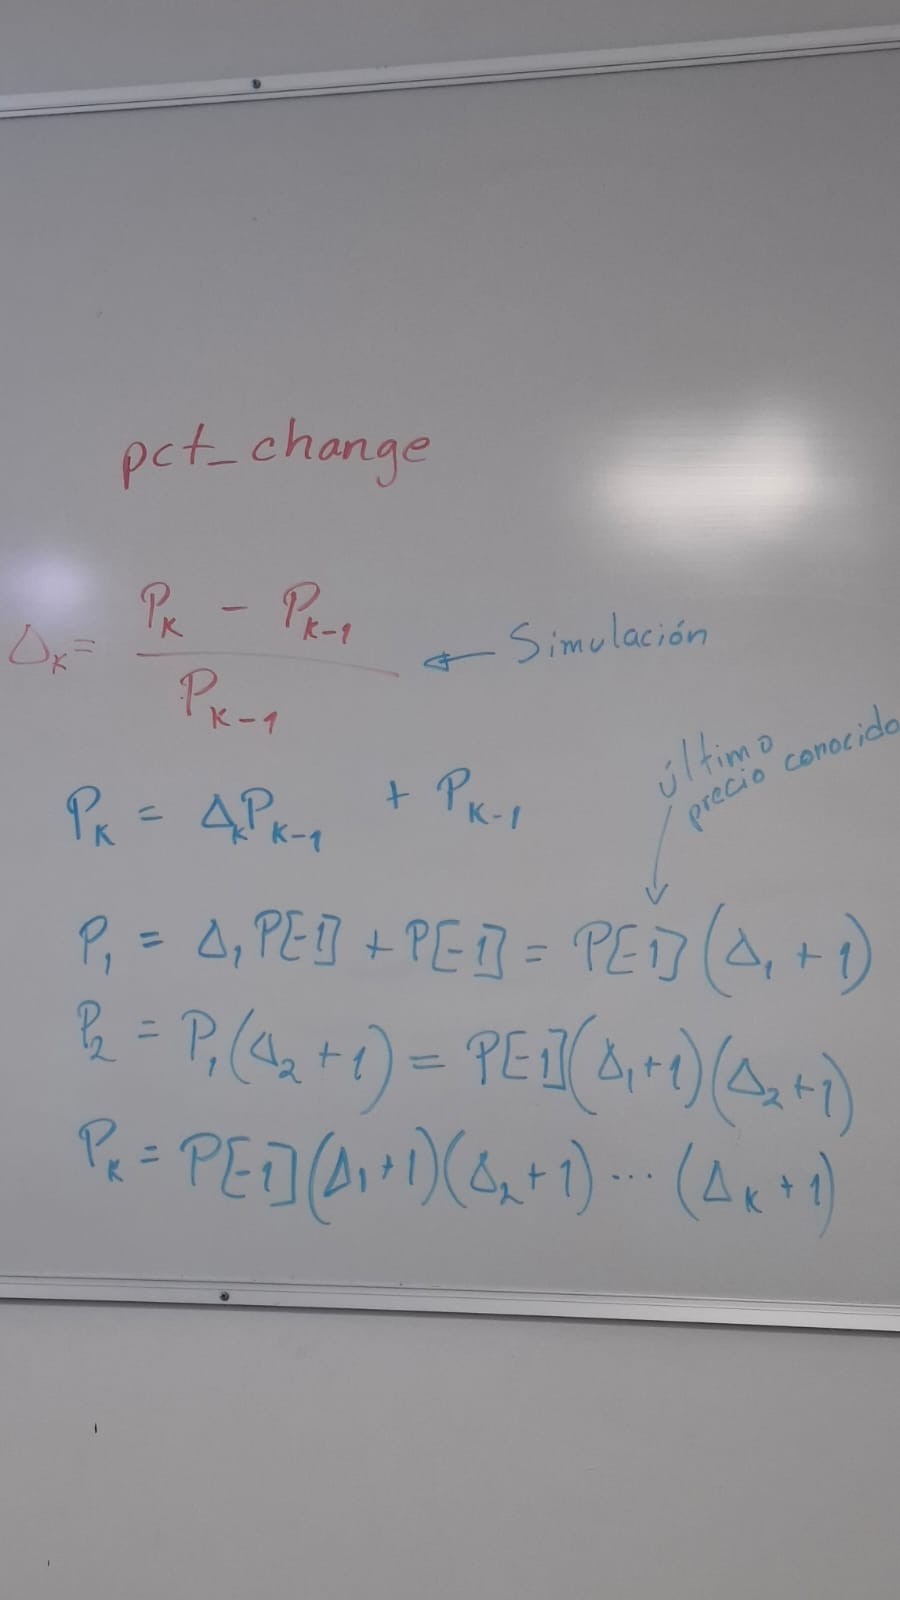

Proyección de precios

$$
P_k=P_0\Pi_{i=1}^k(\Delta_i+1),
$$
donde $P_k$ es el precio proyectado de la simulación den el periodo $k$, $\Delta_i$ es la variación porcentual simulada en el periodo $i$ y $P_0$ es el último precio conocido.

In [17]:
precios_INTC=data['INTC'].iloc[-1]*((delta_INTC+1).cumprod())
precios_INTC.iloc[:2,:5]

,0,1,2,3,4
2025-10-27,37.767253,38.389344,39.830166,39.630885,38.544547
2025-10-28,37.901014,38.260449,38.921275,40.268828,39.804434


¿Cuál es la probabilidad al final del mes de que el último valor conocido supere el 1%?

<Axes: >

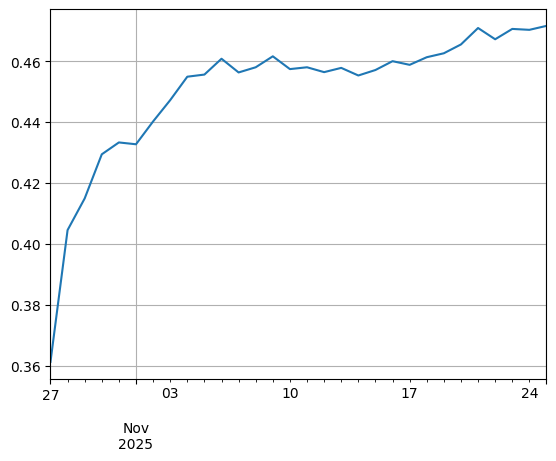

In [19]:
B_INTC=precios_INTC>data['INTC'].iloc[-1]*1.01  #Variable de Bernoulli (Cuántos escenarios satisfacen la condición buscada)
proba_INTC=B_INTC.mean(axis=1)
proba_INTC.plot(grid=True)

Vemos que usando Simulación Montecarlo con 10,000 escenarios, la probabilidad a finales del mes llega a superar momentáneamente el $47$%

In [31]:
#Definimos una función que, dados los datos extraídos, regrese el arreglo de probabilidades del ticker dado como argumento
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  #1. Calculamos las diferencias porcentuales (retorno porcentual)
  delta=data.pct_change().dropna() #el dropna me elimina los NaNs
  #3. Simulamos N_dias y N_escenarios
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  #2. Asociamos los datos a un rango de tiempo
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta=pd.DataFrame(delta_sim,index=rango_tiempo)
  #4. Hacemos una proyección de precios
  precios_simulados=data[ticker].iloc[-1]*((delta+1).cumprod()) #cuprod es producto acumulado
  #5. Calculamos la variable de Bernoulli
  B=precios_simulados>data[ticker].iloc[-1]*1.01
  #6. Sacamos la probabilidad que buscamos (con el promedio de la variable de Bernoulli)
  return B.mean(axis=1)

In [24]:
import matplotlib.pyplot as plt

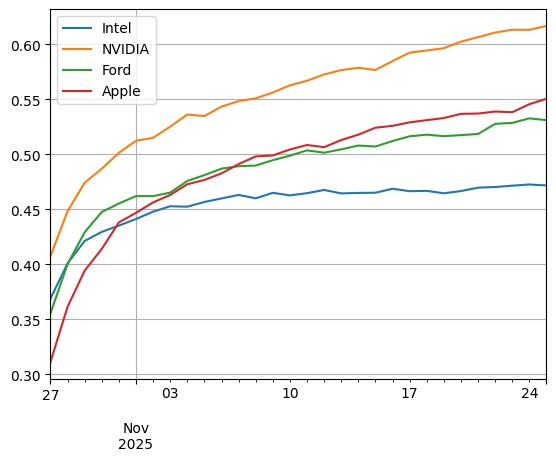

In [32]:
simulacion(data,'INTC','2025-10-27',30,10000).plot(grid=True, label='Intel')
simulacion(data,'NVDA','2025-10-27',30,10000).plot(grid=True,label='NVIDIA')
simulacion(data,'F','2025-10-27',30,10000).plot(grid=True,label='Ford')
simulacion(data,'AAPL','2025-10-27',30,10000).plot(grid=True,label='Apple')
plt.legend()